In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
messages = [
    "Win a free iPhone now!",
    "Meeting at 5 PM today",
    "Congratulations! You won",
    "You won a coupon",
    "Let's catch up soon"
]
labels = ["spam", "ham", "spam", "spam", "ham"]

# Step 1: Convert text to TF-IDF representation using N-Grams (bigrams and trigrams)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(3, 3))  # Consider unigrams and bigrams
X = tfidf_vectorizer.fit_transform(messages)

# Step 2: Train a Naive Bayes classifier
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.7, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 3: Make predictions and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Optional: Display feature names (n-grams) and corresponding TF-IDF values for analysis
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_values = X.toarray()

print("\nTF-IDF Values for each message (with N-Grams):")
for i, message in enumerate(messages):
    print(f"\nMessage: {message}")
    for word, value in zip(feature_names, tfidf_values[i]):
        if value > 0:
            print(f"{word}: {value:.3f}")


Accuracy: 0.5

TF-IDF Values for each message (with N-Grams):

Message: Win a free iPhone now!
free iphone now: 0.707
win free iphone: 0.707

Message: Meeting at 5 PM today
at pm today: 0.707
meeting at pm: 0.707

Message: Congratulations! You won
congratulations you won: 1.000

Message: You won a coupon
you won coupon: 1.000

Message: Let's catch up soon
catch up soon: 0.707
let catch up: 0.707


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
messages = [
    "Win a free iPhone now!",
    "Meeting at 5 PM today",
    "Congratulations! You won",
    "You won a coupon",
    "Let's catch up soon"
]
labels = ["spam", "ham", "spam", "spam", "ham"]

# Step 1: Convert text to TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(messages)

# Step 2: Train a Naive Bayes classifier
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.7, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 3: Make predictions and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Optional: Display feature names and corresponding TF-IDF values for analysis
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_values = X.toarray()

print("\nTF-IDF Values for each message:")
for i, message in enumerate(messages):
    print(f"\nMessage: {message}")
    for word, value in zip(feature_names, tfidf_values[i]):
        if value > 0:
            print(f"{word}: {value:.3f}")


Accuracy: 0.5

TF-IDF Values for each message:

Message: Win a free iPhone now!
free: 0.500
iphone: 0.500
now: 0.500
win: 0.500

Message: Meeting at 5 PM today
at: 0.500
meeting: 0.500
pm: 0.500
today: 0.500

Message: Congratulations! You won
congratulations: 0.659
won: 0.532
you: 0.532

Message: You won a coupon
coupon: 0.659
won: 0.532
you: 0.532

Message: Let's catch up soon
catch: 0.500
let: 0.500
soon: 0.500
up: 0.500


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
messages = [
    "Win a free iPhone now!",
    "Meeting at 5 PM today",
    "Congratulations! You won",
    "You won a coupon",
    "Let's catch catch up soon"

]
labels = ["spam", "ham", "spam", "spam","ham"]

# Step 1: Convert text to Bag of Words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(messages)

# Step 2: Train a Naive Bayes classifier
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.1)
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 3: Make predictions and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [ ]:
# Step 1: Convert text to Bag of Words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(messages)

In [ ]:
#More details on Step 1:
#Step 1a: Convert BoW to a DataFrame for easy visualization
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Step 1b: Add the original messages and labels for context
bow_df['Message'] = messages
bow_df['Label'] = labels

# Step 1c: Rearrange columns to show message and label first
bow_df = bow_df[['Message', 'Label'] + list(vectorizer.get_feature_names_out())]

# Step 1d: Print the Bag of Words DataFrame
print("Bag of Words Representation:")
print(bow_df)

Bag of Words Representation:
                     Message Label  at  catch  congratulations  coupon  free  \
0     Win a free iPhone now!  spam   0      0                0       0     1   
1      Meeting at 5 PM today   ham   1      0                0       0     0   
2   Congratulations! You won  spam   0      0                1       0     0   
3           You won a coupon  spam   0      0                0       1     0   
4  Let's catch catch up soon   ham   0      2                0       0     0   

   iphone  let  meeting  now  pm  soon  today  up  win  won  you  
0       1    0        0    1   0     0      0   0    1    0    0  
1       0    0        1    0   1     0      1   0    0    0    0  
2       0    0        0    0   0     0      0   0    0    1    1  
3       0    0        0    0   0     0      0   0    0    1    1  
4       0    1        0    0   0     1      0   1    0    0    0  


In [ ]:
# Step 2: Train a Naive Bayes classifier
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.1)


In [ ]:
##More details on Step 2:
#Step 2a: Split the data into training and testing sets (we will visualize only the training set)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.1, random_state=42)

# Step 2b: Convert X_train from a sparse matrix to a dense matrix and visualize it
X_train_dense = X_train.toarray()
feature_names = vectorizer.get_feature_names_out()

# Step 2c: Create a DataFrame for easier visualization
X_train_df = pd.DataFrame(X_train_dense, columns=feature_names)

# Add y_train labels to the DataFrame for context
X_train_df['Label'] = y_train

# Print the DataFrame
print("X_train with Labels:")
print(X_train_df)


X_train with Labels:
   at  catch  congratulations  coupon  free  iphone  let  meeting  now  pm  \
0   0      2                0       0     0       0    1        0    0   0   
1   0      0                1       0     0       0    0        0    0   0   
2   0      0                0       0     1       1    0        0    1   0   
3   0      0                0       1     0       0    0        0    0   0   

   soon  today  up  win  won  you Label  
0     1      0   1    0    0    0   ham  
1     0      0   0    0    1    1  spam  
2     0      0   0    1    0    0  spam  
3     0      0   0    0    1    1  spam  


In [ ]:
##More details on Step 2:
#Step 2a: Split the data into training and testing sets (we will visualize only the training set)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.5, random_state=42)

# Step 2b: Convert X_train from a sparse matrix to a dense matrix and visualize it
X_test_dense = X_test.toarray()
feature_names = vectorizer.get_feature_names_out()

# Step 2c: Create a DataFrame for easier visualization
X_test_df = pd.DataFrame(X_test_dense, columns=feature_names)

# Add y_train labels to the DataFrame for context
X_test_df['Label'] = y_test

# Print the DataFrame
print("X_test with Labels:")
print(X_test_df)

X_test with Labels:
   at  catch  congratulations  coupon  free  iphone  let  meeting  now  pm  \
0   1      0                0       0     0       0    0        1    0   1   
1   0      2                0       0     0       0    1        0    0   0   
2   0      0                1       0     0       0    0        0    0   0   

   soon  today  up  win  won  you Label  
0     0      1   0    0    0    0   ham  
1     1      0   1    0    0    0   ham  
2     0      0   0    0    1    1  spam  


In [ ]:
new_messages = [
    " won a iphone5?"
]

# Step 4: Transform the new messages to the BoW format
X_new = vectorizer.transform(new_messages)

# Step 5: Predict the labels for new messages
predictions = model.predict(X_new)

# Step 6: Print the predictions
for message, prediction in zip(new_messages, predictions):
    print(f"Message: {message}\nPrediction: {prediction}\n")

Message:  won a iphone5?
Prediction: spam



<a id="importing-the-relevant-libraries"></a>
### Detailed code on Spam Classifier using larger dataset

In [ ]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import re
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.multiclass import unique_labels

### Loading The Dataset

Data set obtained from google datasets https://datasetsearch.research.google.com/search?src=0&query=spam%20classification&docid=L2cvMTFtamY2Z3Zscg%3D%3D

In [ ]:
import requests

url = 'https://raw.githubusercontent.com/Mai-CS/Deep-Convolutional-Forest/main/processed_spam.csv'
response = requests.get(url)

with open('processed_spam.csv', 'wb') as file:
    file.write(response.content)

print("Download complete.")
data = pd.read_csv('processed_spam.csv')

Download complete.


In [ ]:
data.tail(10)[['Label', 'Message']]

,Label,Message
5561,0,Ok lor... Sony ericsson salesman... I ask shuhui then she say quite gd 2 use so i considering...
5562,0,Ard 6 like dat lor.
5563,0,Why don't you wait 'til at least wednesday to see if you get your .
5564,0,Huh y lei...
5565,1,"REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode"
5566,1,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5567,0,Will Ì_ b going to esplanade fr home?
5568,0,"Pity, * was in mood for that. So...any other suggestions?"
5569,0,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free
5570,0,Rofl. Its true to its name


In [ ]:
# Count of Spam/No-Spam records

data['Label'].value_counts()

,count
Label,
0,4824
1,747


Please note that data

Label=0 mean NO-SPAM,

while 1 means SPAM.

The dataset is also mimicing the real scenerio, where spams(1) are usually lesser than non-spams(0)

Note: The dataset is imbalanced, mean spam vs non-spam are not closely matching. This could bias the model towards higher no. of sample's side.

Fot the moment we shall donwsample the dataset to make the quantities of both label equal.
(There are other advanced techniques like SMOTE but as our core topic is NLP, we will not delve such techniques to distract out attention.)


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'data'
minority_class_count = data['Label'].value_counts().min()

# Create a new DataFrame with an equal number of samples from each class
balanced_data = pd.concat([
    data[data['Label'] == label].sample(minority_class_count, random_state=42)
    for label in data['Label'].unique()
])

In [ ]:
balanced_data['Label'].value_counts()

,count
Label,
0,747
1,747


In [ ]:
# dropping null values in 2 text columns
data = balanced_data.dropna(subset=['ProcessedMessage', 'Message']).reset_index(drop=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Label                    1492 non-null   int64  
 1   Message                  1492 non-null   object 
 2   ProcessedMessage         1492 non-null   object 
 3   characters_count         1492 non-null   int64  
 4   words_count              1492 non-null   int64  
 5   readability              1492 non-null   float64
 6   misspelled_count         1492 non-null   int64  
 7   emails_count             1492 non-null   int64  
 8   phones_count             1492 non-null   int64  
 9   is_currency_found        1492 non-null   int64  
 10  call                     1492 non-null   int64  
 11  å£                       1492 non-null   int64  
 12  free                     1492 non-null   int64  
 13  txt                      1492 non-null   int64  
 14  text                    

### **Import Libraries for Data Preparation**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stemmer  = SnowballStemmer(language='english') #setup for english language
stop_words = stopwords.words('english') # defining stop_words for english language
lemmatizer = WordNetLemmatizer()

In [ ]:
#function to create tokenizer
def tokenize(text):
    return [stemmer.stem(token) for token in word_tokenize(text)]

In [ ]:
#  Lets test the tokenize function
tokenize("Huggingface is a great place to learn data science")

['huggingfac', 'is', 'a', 'great', 'place', 'to', 'learn', 'data', 'scienc']

<a id="text-pre-processing"></a>
### Text Pre-processing

The dataset has 1 text column which is the Phrase column. Now, let's process the text in the phrase column as follows.

First, strip all punctuations and html tags and extract only the texts;

Second, convert text to lowercase;

Finally, convert all phrases to tokens that our model will use.

In [ ]:
# A basic text preprocessing function
def data_preprocess(Phrase):
    Phrase = re.sub(re.compile('<.*?>'), '', Phrase) #removing html tags if any
    Phrase = re.sub('[^A-Za-z0-9]+', ' ', Phrase) #taking only words
    Phrase = Phrase.lower()   # making all phrases lower case
    tokens = nltk.word_tokenize(Phrase) # converts Phrases to tokens
    Phrase = [word for word in tokens if word not in stop_words] #removing stop words
    Phrase = [lemmatizer.lemmatize(word) for word in Phrase]   # lemmatization
    Phrase = ' '.join(Phrase)  # join words in preprocessed Phrase

    return Phrase

In [ ]:
#using my own data cleaning instead of already available column
data['Preprocessed_phrase'] = data['Message'].apply(data_preprocess)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data['Preprocessed_phrase'],
    #data['ProcessedMessage'],
    data['Label'],
    random_state=42,
    stratify=data['Label'])


<a id="exploratory-data-analysis-eda"></a>
### Exploratory Data Analysis EDA

In [ ]:
# Checking the shape of all data
print("train dataset: ",X_train.shape)
print("test dataset: ",X_test.shape)


train dataset:  (1119,)
test dataset:  (373,)


In [ ]:
X_train.info()

<class 'pandas.core.series.Series'>
Index: 1119 entries, 900 to 599
Series name: Preprocessed_phrase
Non-Null Count  Dtype 
--------------  ----- 
1119 non-null   object
dtypes: object(1)
memory usage: 17.5+ KB


In [ ]:
# extract features
vectorizer = CountVectorizer(binary=True).fit(X_train)   # for bow
#vectorizer = CountVectorizer(ngram_range=(1, 1)).fit(X_train)   # for ngrams
X_train_vectorized = vectorizer.transform(X_train)
X_train_vectorized.toarray().shape

(1119, 3518)

In [ ]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(vectorizer.transform(X_test))

acc_bow = accuracy_score(y_pred, y_test)
print("Accuracy:", 100 * acc_bow, '%')

f1_bow = f1_score(y_test, y_pred, average='weighted')
print('F1 Score: ', 100 * f1_bow, '%')


Accuracy: 94.10187667560321 %
F1 Score:  94.10009553396081 %


Test Cases

In [ ]:
model.predict(vectorizer.transform(
    [
        "Thank you, ABC. Can you also share your LinkedIn profile? As you are a good at programming at pyhthon, would be willing to see your personal/college projects.",
        "Hi y’all, We have a Job Openings in the positions of software engineer, IT officer at ABC Company.Kindly, send us your resume and the cover letter as soon as possible if you think you are an eligible candidate and meet the criteria.",
        "Dear ABC, Congratulations! You have been selected as a SOftware Developer at XYZ Company. We were really happy to see your enthusiasm for this vision and mission. We are impressed with your background and we think you would make an excellent addition to the team.",
    ])
            )

array([0, 0, 0])

In [ ]:
model.predict(vectorizer.transform(
    [
        "congratulations, you became today's lucky winner",           # non spam
        "1-month unlimited calls offer Activate now",                 # non-spam
        "We at compnay XYZ wants your phonenumber for contacting later", # spam
    ])
            )

array([1, 1, 0])

**Let's plot a confusion matrix of this classifier to help understand how well our model performs and also to find out if there is a pattern in the classification errors.**

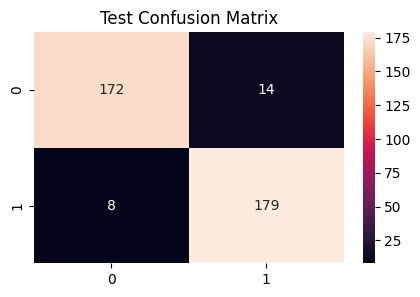

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
y_pred = model.predict(vectorizer.transform(X_test))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

### Building a model with Naive Bayes' Term Frequency-Inverse Document Frequency (TFIDF)

We will use this classifier to convert text data into TF-IDF vectors. This classifier will learn the relationship between TF-IDF vectors and their corresponding class labels.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_phrase_tfidf = vectorizer.fit_transform(X_train)
X_test_phrase_tfidf = vectorizer.transform(X_test)

print('X_train_phrase_tfidf shape: ', X_train_phrase_tfidf.shape)
print('X_test_phrase_tfidf shape: ', X_test_phrase_tfidf.shape)

X_train_phrase_tfidf shape:  (1119, 3518)
X_test_phrase_tfidf shape:  (373, 3518)


In [ ]:
clf = MultinomialNB(alpha=1)
clf.fit(X_train_phrase_tfidf, y_train)

y_pred = clf.predict(X_test_phrase_tfidf)
acc_tfidf_nb = accuracy_score(y_test, y_pred)
f1_tfidf_nb = f1_score(y_test, y_pred, average='weighted')
print('Accuracy: ', acc_tfidf_nb)
print('F1 Score: ', f1_tfidf_nb)

Accuracy:  0.9463806970509383
F1 Score:  0.9463783845450606


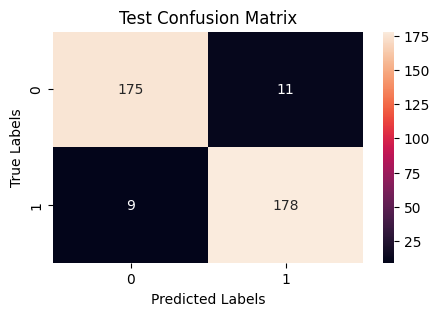

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

### Using Logistic Regression TFIDF Model

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2')
clf.fit(X_train_phrase_tfidf, y_train)

y_pred = clf.predict(X_test_phrase_tfidf)
acc_tfidf_lr = accuracy_score(y_test, y_pred)
f1_tfidf_lr = f1_score(y_test, y_pred, average='weighted')
print('Accuracy: ', acc_tfidf_lr)
print('F1 Score: ', f1_tfidf_lr)

Accuracy:  0.9517426273458445
F1 Score:  0.9516794232452179


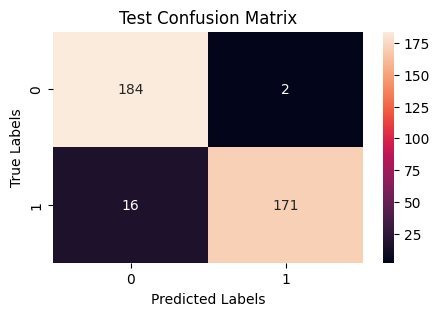

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Visualizing the three models on a Table

In [ ]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ['Vectorizer', 'Model', 'Accuracy', 'f1-score']
x.add_row(['BOW', 'Naive Bayes', f'{acc_bow}', f'{f1_bow}'])
x.add_row(['TFIDF', 'Naive Bayes', f'{acc_tfidf_nb}', f'{f1_tfidf_nb}'])
x.add_row(['TFIDF', 'Logistic Regression', f'{acc_tfidf_lr}', f'{acc_tfidf_lr}'])
print(x)

+------------+---------------------+--------------------+--------------------+
| Vectorizer |        Model        |      Accuracy      |      f1-score      |
+------------+---------------------+--------------------+--------------------+
|    BOW     |     Naive Bayes     | 0.9410187667560321 | 0.9410009553396081 |
|   TFIDF    |     Naive Bayes     | 0.9463806970509383 | 0.9463783845450606 |
|   TFIDF    | Logistic Regression | 0.9517426273458445 | 0.9517426273458445 |
+------------+---------------------+--------------------+--------------------+
